In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Derivation of ODEs
The Blasius equation is given by:
$$f^{'''}(x) + \frac{1}{2}f^{''}(x)f^{'}(x)=0$$

Substituting the following variables
$$ g(x) = f^{'}(x)$$
$$ h(x) = g^{'}(x)$$

Gives the following set of ODE
$$f^{'}(x) = g(x) $$
$$g^{'}(x) = h(x) $$
$$h^{'}(x) = -\frac{1}{2}h(x)g(x) $$

Using forward Euler for the discretization gives:
$$f^{'}(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} $$
$$g^{'}(x) = \frac{g(x+\Delta x) - g(x)}{\Delta x} $$
$$h^{'}(x) = \frac{h(x+\Delta x) - h(x)}{\Delta x} $$

Substituting in the equation gives:

$$f(x+\Delta x) = g(x)\Delta x+f(x)$$
$$g(x+\Delta x) = h(x)\Delta x+g(x)$$
$$h(x+\Delta x) = -\frac{1}{2}h(x)g(x)\Delta x+h(x)$$

## Solve ODEs

In [160]:
#discretization
n=100
x = np.logspace(-3,0,n)
dx = np.diff(x)
f = np.zeros(n)
g = np.zeros(n)
h = np.zeros(n)

In [161]:
niter = 0
while niter < 100: 
    #apply bc
    h[0] = 1
    
    #solve equation
    for i in range(0,n-1):
        ip = i+1
        f[ip] =            g[i]*dx[i] + f[i]
        g[ip] =            h[i]*dx[i] + g[i]
        h[ip] = (1/2)*h[i]*g[i]*dx[i] + h[i]
    
    
    niter +=1

## Plot solution

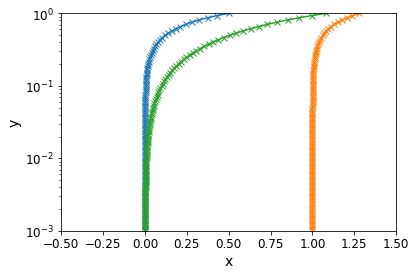

In [172]:
fig, ax = plt.subplots()
ax.plot(f,x, label='f', marker='x')
ax.plot(h,x, label='h', marker='x')
ax.plot(g,x, label='g', marker='x')
ax.set_yscale("log")
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xbound(-0.5,1.5)
ax.set_ybound(1e-3,1)
plt.savefig("blasius_cp.png")

## Store solution

In [171]:
df = pd.DataFrame(np.array([x,f,h,g]).T,columns=['x','f','g','h'])
df.to_csv("blasius_cp.csv",index=None, sep="\t", header=True)